# DS特論 第4回課題レポート

提出日:2020年12月27日  

所属:人間情報科学コース  
学籍番号: 6612200006-1   
氏名: 浮田 凌佑  









## Dataset の扱い

In [530]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import torch
from torch.autograd import Variable
import torch.optim as optim

In [388]:
#Iris Datasetを読み込み
iris = datasets.load_iris()

In [389]:
#あやめのデータ（説明変数）をDataFrameでdataXに格納する
dataX = pd.DataFrame(data=iris.data,columns=iris.feature_names)
dataX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [390]:
#あやめのデータ（目的変数）をDataFrameでdataYに格納する
dataY = pd.DataFrame(data=iris.target)
dataY = dataY.rename(columns={0: 'Species'})
dataY.head()

,Species
0,0
1,0
2,0
3,0
4,0


### 冒頭のみの表示

In [391]:
#あやめのデータ(全体)
iris_df = pd.concat([dataX, dataY], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### データ基礎集計

データ数(150件)

In [7]:
#irisデータのデータ数, 欠損値や型を確認
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
#データの平均, 標準偏差, 最大値, 最小値などを集計
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


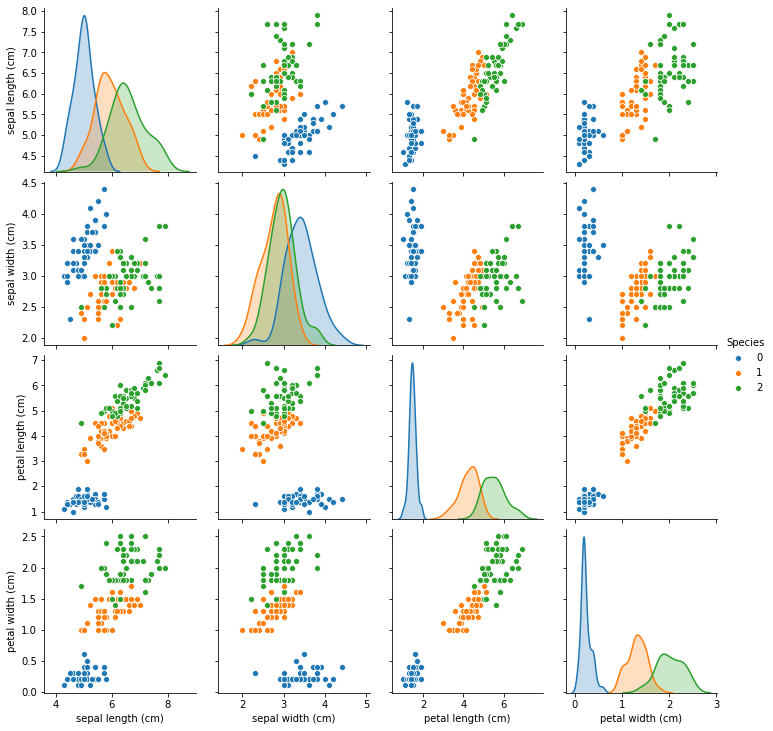

In [9]:
# 散布図行列を書いてみる
sns.pairplot(iris_df, hue='Species')

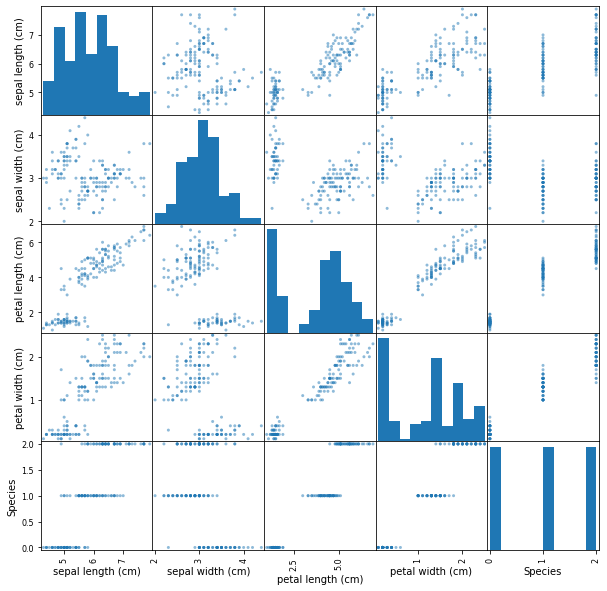

In [10]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(iris_df, figsize=(10,10))
plt.show()

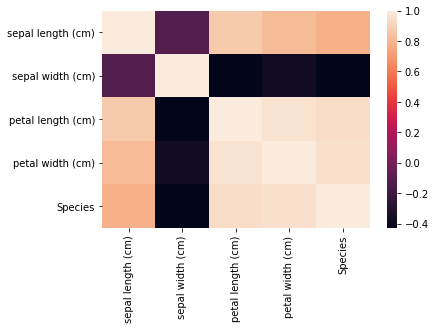

In [11]:
# 相関係数をヒートマップにして可視化
sns.heatmap(iris_df.corr())
plt.show()

In [12]:
# 相関係数を確認
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


###  Irisのデータの80%を学習データに、20%を実験データとする

In [410]:
X = dataX.values
Y = dataY.values
#y = y.reshape(-1,)
#データの分割
#目的変数0~2が均等になるようにstratifyを指定
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (120, 4)
y_train.shape =  (120, 1)
X_test.shape =  (30, 4)
y_test.shape =  (30, 1)


## 課題1: 学習データについて、Speciesを⽬的変数,他の4変数を説明変数として判別関数を決定しなさい

[設問の補足]  
ネットワークに得られた重みを追記することによって設問①の回答とする.

In [411]:
import torch
#120件の学習データと30件のテストデータをテンソル型に変換
X_train = torch.from_numpy(X_train).float()
y_train = torch.tensor([[float(x)] for x in y_train])
X_test = torch.from_numpy(X_test).float()
y_test = torch.tensor([[float(x)] for x in y_test])

### 作成するニューラルネットワーク

入力層：ノードは4（がく片(Sepal)と花弁(Petal)の⻑さ( Length)と幅(Width)）, 出力5  
隠れ層：ノードは5（入力層からの出力）, 出力1  
出力層：ノードは1（隠れ層からの出力を受け取り, それをそのまま出力）

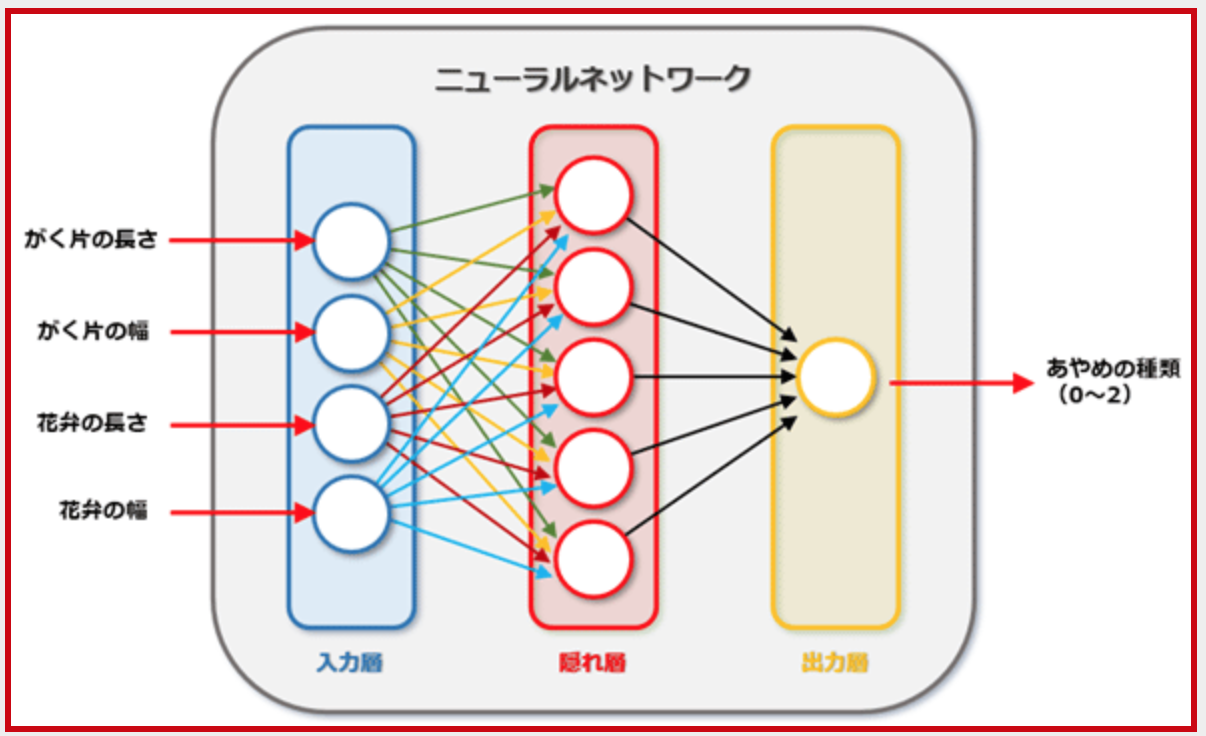

In [207]:
from IPython.display import Image
Image(filename='NN.png')
#URL:https://www.atmarkit.co.jp/ait/articles/2004/03/news016_2.html

In [281]:
from torch import nn
import torch.nn.functional as F

#入力層のノード
INPUT_FEATURES = 4
#隠れ層のノード
HIDDEN = 5
#出力層のノード
OUTPUT_FEATURES = 1

#ニューラルネットワークを表すクラス
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_FEATURES, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, OUTPUT_FEATURES)

    def forward(self, x):
        h = F.relu(self.fc1(x))# 入力データ→入力層→活性化関数
        y = self.fc2(h)# 活性化関数(ReLU)→隠れ層→出力
        return y

In [412]:
net = Net()  # ニューラルネットワークのインスタンスを生成

criterion = nn.MSELoss()  # 損失関数
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)  # 最適化アルゴリズム

EPOCHS = 2000  # エポック数を定義(2000回繰り返す)

for epoch in range(EPOCHS):
    optimizer.zero_grad()  # 重みとバイアスの更新で内部的に使用するデータをリセット
    outputs = net(X_train)  # 手順1：ニューラルネットワークにデータを入力
    loss = criterion(outputs, y_train)  # 手順2：正解ラベルとの比較
    loss.backward()  # 手順3-1：誤差逆伝播
    optimizer.step()  # 手順3-2：重みとバイアスの更新
    
    if epoch % 100 == 99:  # 100回繰り返すたびに損失を表示
        print(f'epoch: {epoch+1:4}, loss: {loss.data}')

print('training finished')

epoch:  100, loss: 0.05726942420005798
epoch:  200, loss: 0.05048114061355591
epoch:  300, loss: 0.04760584235191345
epoch:  400, loss: 0.04547570273280144
epoch:  500, loss: 0.04393572732806206
epoch:  600, loss: 0.04283509775996208
epoch:  700, loss: 0.04204447939991951
epoch:  800, loss: 0.04146626591682434
epoch:  900, loss: 0.04103248193860054
epoch: 1000, loss: 0.04069802537560463
epoch: 1100, loss: 0.0404336117208004
epoch: 1200, loss: 0.04022025316953659
epoch: 1300, loss: 0.04004523903131485
epoch: 1400, loss: 0.03989989683032036
epoch: 1500, loss: 0.03977802023291588
epoch: 1600, loss: 0.03967500850558281
epoch: 1700, loss: 0.039587318897247314
epoch: 1800, loss: 0.03951219841837883
epoch: 1900, loss: 0.03944741562008858
epoch: 2000, loss: 0.039391182363033295
training finished


### 設問①回答: ネットワークに得られた重み

In [413]:
print(net.fc1.weight)

Parameter containing:
tensor([[ 0.0983,  0.0237,  0.1333,  0.5345],
        [-0.1406, -0.0795,  0.1876,  0.1440],
        [ 0.2515,  0.1018,  0.3865, -0.4166],
        [-0.1866, -0.2701,  0.5915,  0.4226],
        [-0.4088,  0.0075, -0.3526, -0.3019]], requires_grad=True)


In [414]:
print(net.fc2.weight)

Parameter containing:
tensor([[ 0.3981, -0.4165, -0.2845,  0.7275,  0.3637]], requires_grad=True)


ネットワークに得られた重みは, 上記のものとなった

これらの結果から判別関数が決定されていることがわかる

## 課題2: 判別関数を実験データの判別に適⽤しなさい(+判別精度計算)

In [415]:
#実験用データを使って, 学習済みモデルで予測
result = net(X_test)
predict_test = (result + 0.5).int()

In [416]:
compare_test = predict_test.numpy() == y_test.numpy()

print(f'correct: {compare_test.sum()} / {len(predict_test)}')
for value, label in zip(predict_test, y_test):
    print('predicted:', iris.target_names[value.item()], '<--->','label:', iris.target_names[int(label.item())])

correct: 30 / 30
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virgini

In [417]:
from sklearn.metrics import accuracy_score

#分類結果
acc_test = accuracy_score(y_test, predict_test)
print('実験用データの正解率：{:.1f}%'.format(acc_test*100))

実験用データの正解率：100.0%


上記の結果から学習したモデルによって, 実験用データについて判別できていることがわかる.

判別精度は100%達成されていることがわかる

## 考察と感想

### 考察①:学習データでの予測

設問から, 学習したモデルによって, 30個の実験用データのうち30個正解, 100％の正解率で, あやめの種別を問わず全て判別できていることがわかる.  
学習データでも予測を行うことにした.

In [418]:
#学習用データを使って, 学習済みモデルで予測
result = net(X_train)
predict_train = (result + 0.5).int()
compare_train = predict_train.numpy() == y_train.numpy()

print(f'correct: {compare_train.sum()} / {len(predict_train)}')
for value, label in zip(predict_train, y_train):
    print('predicted:', iris.target_names[value.item()], '<--->','label:', iris.target_names[int(label.item())])

correct: 117 / 120
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: virgin

In [419]:
acc_train = accuracy_score(y_train, predict_train)
print('学習用データの正解率：{:.1f}%'.format(acc_train*100))

学習用データの正解率：97.5%


------------------------------------------------------------------------------------------------------------

学習データでは, 120個の実験用データのうち,117個の正解で, 正解率は97.5%であることがわかった.  
これらの結果から, 訓練データ以外のデータが入力されても, それがどんな品種のあやめなのかをある程度は正しく判断できることが確認できた. そのため, 学習済みのニューラルネットワークは, 汎用的であることがわかった.

しかし, 学習データでは, 100%の正解率ではないことから, どんなデータに対しても必ず正しく予測できるとは限らないことが見て取れる.

### 考察②:ニューラルネットワークの特徴

ニューラルネットワークは, 予測する手法としては, 汎用的である一方で, 結果からの解釈が難しいことが問題として挙げられると感じた.
レポート1で用いた単回帰分析の判別関数(1次関数)では, 説明変数の係数から変数との関係が解釈・予測しやすい手法であった.  
しかし, ニューラルネットワークの判別関数(ネットワークの重み)では, 変数との関係が, 直感的に理解できず, なぜこのような予測になるのかが説明ができないことがわかる.

### 考察③:irisデータの特徴

irisデータの判別は, 学習データ数が比較的少なく, ハイパーパラメータのチューニングしていない, 簡単な3層のニューラルネットワークを用いても, かなりの精度で解けたことから, 比較的簡単な問題であったと考えられる.  
そこで, データを確認するため, 散布図行列を再掲する

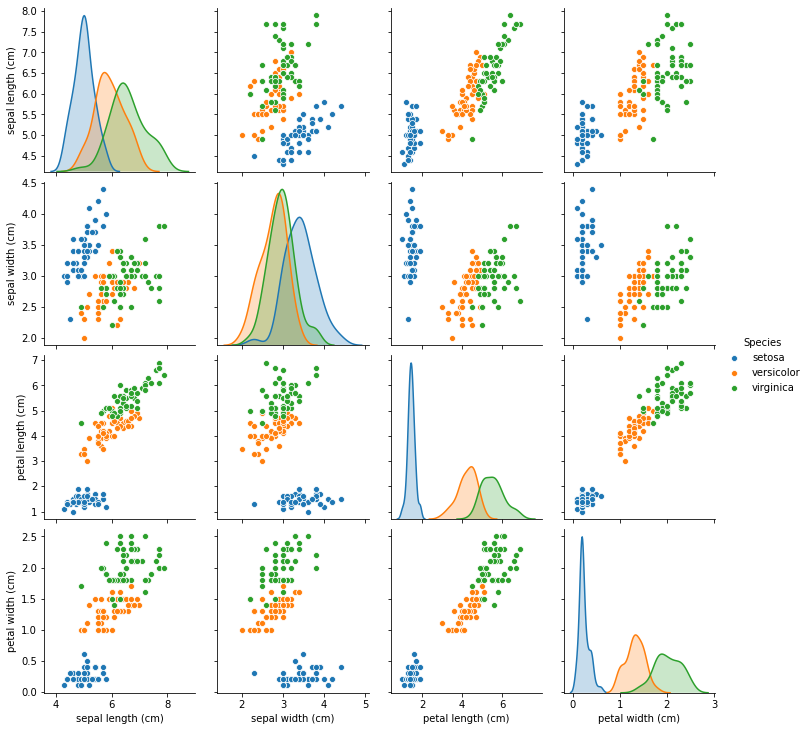

In [420]:
iris_df.loc[iris_df['Species'] == 0, 'Species'] = "setosa"
iris_df.loc[iris_df['Species'] == 1, 'Species'] = "versicolor"
iris_df.loc[iris_df['Species'] == 2, 'Species'] = "virginica"
sns.pairplot(iris_df, hue='Species')

散布図から, setosa(青色)は, 花弁の⻑さ((Petal Length)や花弁の幅(Petal Width)だけでも, 比較的分類が容易であることがわかり, さらに, その他の説明変数でも2変数を用いることで, 分離可能であることがわかる.  
これらの結果から, irisの判別は, 簡単な問題であったと考えられる.

### 考察④:種別(3種類)ごとの正解率

種別(3種類)ごとの正解率を確認するため, 混同行列を用いて, データ全体の予測値と正解のクロス集計を行った

In [421]:
from sklearn.metrics import confusion_matrix
# 予測値と正解のクロス集計（混同行列）
dataX_tensor = torch.from_numpy(dataX.to_numpy()).float()
dataY_numpy = dataY.to_numpy()

result = net(dataX_tensor)
y_pred = (result + 0.5).int()
y_pred_numpy = y_pred.detach().numpy()

conf_mat = confusion_matrix(dataY_numpy, y_pred_numpy)

conf_mat = pd.DataFrame(conf_mat, 
                        index=['正解 = setosa', '正解 = versicolor', '正解 = virginica'], 
                        columns=['予測 = setosa', '予測 = versicolor', '予測 = virginica'])
conf_mat

,予測 = setosa,予測 = versicolor,予測 = virginica
正解 = setosa,50,0,0
正解 = versicolor,0,48,2
正解 = virginica,0,1,49


混同行列の結果から, setosaは予測できていることがわかる一方, versicolor, virginicaの判別は難しいとこがわかる.

考察③での散布図から, setosa(青色)は, 花弁の⻑さ((Petal Length)や花弁の幅(Petal Width)だけでも, 分類が容易であることがわかる一方, versicolor(オレンジ), virginica(緑)は, 重なっている部分が多く, 分離が難しいことがわかる

### 考察⑤:ニューラルネットワークの層の検討

結果より, 実験用データでは100％の正解率なのに対し, 学習データでは, 正解率は97.5%であったことから, ニューラルネットワークの層を増やすことで, 学習データでの正解率を上げようと考えた.

### 作成するニューラルネットワーク２

・入力層：ノードは4（がく片(Sepal)と花弁(Petal)の⻑さ( Length)と幅(Width)）, 出力5  
・隠れ層1：ノードは5（入力層からの出力）, 出力5  
・隠れ層2：ノードは5（入力層からの出力）, 出力1    
・出力層：ノードは1（隠れ層からの出力を受け取り, それをそのまま出力）  

In [506]:
class Net2(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_FEATURES, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, OUTPUT_FEATURES)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        y = self.fc4(x)
        return y

In [507]:
net = Net2()  # ニューラルネットワークのインスタンスを生成

criterion = nn.MSELoss()  # 損失関数
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)  # 最適化アルゴリズム

EPOCHS = 2000  # エポック数を定義(2000回繰り返す)

for epoch in range(EPOCHS):
    optimizer.zero_grad()  # 重みとバイアスの更新で内部的に使用するデータをリセット
    outputs = net(X_train)  # 手順1：ニューラルネットワークにデータを入力
    loss = criterion(outputs, y_train)  # 手順2：正解ラベルとの比較
    loss.backward()  # 手順3-1：誤差逆伝播
    optimizer.step()  # 手順3-2：重みとバイアスの更新
    
    if epoch % 100 == 99:  # 100回繰り返すたびに損失を表示
        print(f'epoch: {epoch+1:4}, loss: {loss.data}')

print('training finished')

epoch:  100, loss: 0.6903102993965149
epoch:  200, loss: 0.6668945550918579
epoch:  300, loss: 0.6663083434104919
epoch:  400, loss: 0.6657614707946777
epoch:  500, loss: 0.6645917296409607
epoch:  600, loss: 0.6623770594596863
epoch:  700, loss: 0.658750057220459
epoch:  800, loss: 0.6519583463668823
epoch:  900, loss: 0.6372414231300354
epoch: 1000, loss: 0.6024836897850037
epoch: 1100, loss: 0.5106945633888245
epoch: 1200, loss: 0.33364495635032654
epoch: 1300, loss: 0.14780549705028534
epoch: 1400, loss: 0.05819263309240341
epoch: 1500, loss: 0.04486217722296715
epoch: 1600, loss: 0.04218347743153572
epoch: 1700, loss: 0.040964171290397644
epoch: 1800, loss: 0.0401865616440773
epoch: 1900, loss: 0.039596717804670334
epoch: 2000, loss: 0.03911283612251282
training finished


In [508]:
#学習用データを使って, 学習済みモデルで予測
result = net(X_train)
predict_train = (result + 0.5).int()
#分類結果
acc_train = accuracy_score(y_train, predict_train)
print('学習用データの正解率：{:.1f}%'.format(acc_train*100))

#実験用データを使って, 学習済みモデルで予測
result = net(X_test)
predict_test = (result + 0.5).int()
#分類結果
acc_test = accuracy_score(y_test, predict_test)
print('実験用データの正解率：{:.1f}%'.format(acc_test*100))

学習用データの正解率：98.3%
実験用データの正解率：100.0%


学習データでの, 正解率は98.3%であったことから, ニューラルネットワークの層を増やすことで, 学習データでの正解率を上がったことがわかる.

さらに隠れ層を増やすことにした

In [526]:
class Net3(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_FEATURES, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN)
        self.fc5 = nn.Linear(HIDDEN, HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, OUTPUT_FEATURES)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        y = self.fc6(x)
        return y

In [527]:
net = Net3()  # ニューラルネットワークのインスタンスを生成

criterion = nn.MSELoss()  # 損失関数
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)  # 最適化アルゴリズム

EPOCHS = 2000  # エポック数を定義(2000回繰り返す)

for epoch in range(EPOCHS):
    optimizer.zero_grad()  # 重みとバイアスの更新で内部的に使用するデータをリセット
    outputs = net(X_train)  # 手順1：ニューラルネットワークにデータを入力
    loss = criterion(outputs, y_train)  # 手順2：正解ラベルとの比較
    loss.backward()  # 手順3-1：誤差逆伝播
    optimizer.step()  # 手順3-2：重みとバイアスの更新
    
    if epoch % 100 == 99:  # 100回繰り返すたびに損失を表示
        print(f'epoch: {epoch+1:4}, loss: {loss.data}')

print('training finished')

epoch:  100, loss: 0.6721968054771423
epoch:  200, loss: 0.6629415154457092
epoch:  300, loss: 0.659583568572998
epoch:  400, loss: 0.655847430229187
epoch:  500, loss: 0.6497622132301331
epoch:  600, loss: 0.6388863921165466
epoch:  700, loss: 0.6172423362731934
epoch:  800, loss: 0.5744216442108154
epoch:  900, loss: 0.4693767726421356
epoch: 1000, loss: 0.25065985321998596
epoch: 1100, loss: 0.11076389998197556
epoch: 1200, loss: 0.07403240352869034
epoch: 1300, loss: 0.06231865659356117
epoch: 1400, loss: 0.05669478327035904
epoch: 1500, loss: 0.05356145277619362
epoch: 1600, loss: 0.05145919322967529
epoch: 1700, loss: 0.04978613927960396
epoch: 1800, loss: 0.048260852694511414
epoch: 1900, loss: 0.046560127288103104
epoch: 2000, loss: 0.04492314159870148
training finished


In [528]:
#学習用データを使って, 学習済みモデルで予測
result = net(X_train)
predict_train = (result + 0.5).int()
#分類結果
acc_train = accuracy_score(y_train, predict_train)
print('学習用データの正解率：{:.1f}%'.format(acc_train*100))

#実験用データを使って, 学習済みモデルで予測
result = net(X_test)
predict_test = (result + 0.5).int()
#分類結果
acc_test = accuracy_score(y_test, predict_test)
print('実験用データの正解率：{:.1f}%'.format(acc_test*100))

学習用データの正解率：95.8%
実験用データの正解率：100.0%


学習データでの, 正解率は95.8%に下がったことから, ニューラルネットワークの層を増やすことが, 必ずしも正解率を上げることにつながるわけではないことがわかる.